<a href="https://colab.research.google.com/github/BhagatSurya/Imge-Classification-with-DL/blob/main/Image_Classification_with_DL_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bhagat Surya Here !! ⭐

we are going to do the image classfication

Data from Tensorflow Dataset



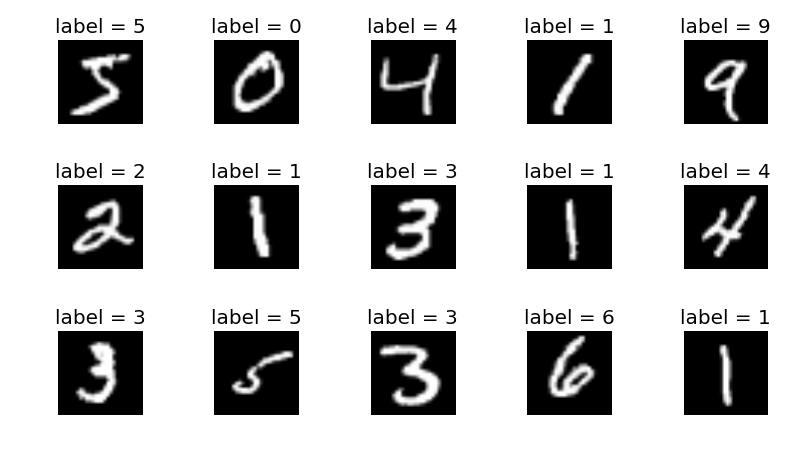

In [1]:
# import pandas, pandas and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the Data from the tf datasets 
from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#geting the first sample 
print(f'Training Sample\n{train_data[0]}')
print(f'Training Sample\n{train_labels[0]}')

Training Sample
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

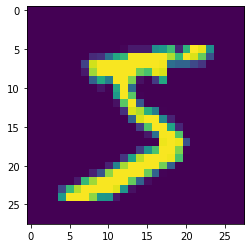

In [4]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [5]:
type(train_labels)#checking the type of the lables


numpy.ndarray

In [6]:
np.unique(train_labels)#geting the unique values  it means 0 to 9 there are 10 outputs


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_data.shape[1:]


(28, 28)

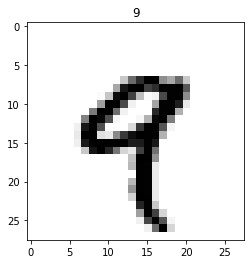

In [8]:
# Plot an example image and its label
plt.imshow(train_data[4], cmap=plt.cm.binary) # change the colours to black & white
plt.title(train_labels[4]);

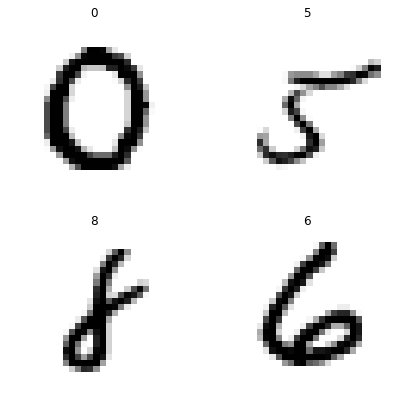

In [9]:
# Plot multiple random images of  MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(train_labels[rand_index])
  plt.axis(False)

In [10]:
import tensorflow as tf
from keras.utils import np_utils

In [11]:
train_data = train_data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)
# one hot encode target values
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
# normalize to range 0-1
train_data = train_data / 255.0
test_data = test_data / 255.0

In [12]:
train_data.shape

(60000, 28, 28, 1)

#CNN

In [13]:
#creating the check point 
# Setup checkpoint path
checkpoint_path = "the_CNN_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, # set to False to save the entire model
                                                         save_best_only=True,
                                                         montior="val_accuracy",
                                                         save_weights_only=True,# set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [14]:
#model creation using the TF Functional Api 
tf.random.set_seed(42)
# Create a CNN model  
model_cnn_min_VGG_16 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(28, 28, 1)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation="sigmoid") # binary activation output
],name='model_cnn_min_VGG_16_model')

In [15]:
model_cnn_min_VGG_16.summary()

Model: "model_cnn_min_VGG_16_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                    

In [16]:
model_cnn_min_VGG_16.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
history = model_cnn_min_VGG_16.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels), verbose=0,callbacks=[checkpoint_callback])



Epoch 1: val_loss improved from inf to 0.10551, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 2: val_loss improved from 0.10551 to 0.07174, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 3: val_loss improved from 0.07174 to 0.04571, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 4: val_loss improved from 0.04571 to 0.04559, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 5: val_loss improved from 0.04559 to 0.04016, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 6: val_loss improved from 0.04016 to 0.03644, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 7: val_loss did not improve from 0.03644

Epoch 8: val_loss did not improve from 0.03644

Epoch 9: val_loss improved from 0.03644 to 0.03404, saving model to the_CNN_model_checkpoints_weights/checkpoint.ckpt

Epoch 10: val_loss improved from 0.03404 to 0.03106, saving model to the_C

In [20]:
model_cnn_min_VGG_16.evaluate(test_data, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.0311 - accuracy: 0.9897


[0.031062563881278038, 0.9897000193595886]

In [21]:
model_cnn_min_VGG_16.evaluate(train_data, train_labels)

1875/1875 [==============================] - 26s 14ms/step - loss: 0.0216 - accuracy: 0.9933


[0.021630071103572845, 0.9933333396911621]

In [23]:
model_cnn_min_VGG_16.save('model_cnn_min_VGG_16.h5')